In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import scatterplot as scatter
import sys
sys.path.insert(0, 'FuzzyCM')
!pip install fuzzy-c-means
from fcmeans import FCM
%matplotlib inline 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gacha321/DATMIN/main/CC%20GENERAL.csv')

df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [4]:
df["MINIMUM_PAYMENTS"].fillna(0, inplace = True) 
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
df["CREDIT_LIMIT"].fillna(0, inplace = True) 
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
df_using = df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'CREDIT_LIMIT',	'PAYMENTS',	'MINIMUM_PAYMENTS']]
X = (np.asarray(df_using))

In [8]:
df_using.isnull().sum()

BALANCE             0
PURCHASES           0
ONEOFF_PURCHASES    0
CREDIT_LIMIT        0
PAYMENTS            0
MINIMUM_PAYMENTS    0
dtype: int64

In [9]:
fcm = FCM (n_clusters=3, m=2, error=0.005, max_iter=10)
fcm.fit(X)
fcm_centers = fcm.centers
fcm_labels = fcm.u.argmax(axis=1)

In [10]:
print(fcm_centers)
print(fcm_labels)

[[ 754.5901   462.2795   222.11754 2098.5378   815.9255   442.1327 ]
 [1644.3856  1216.6401   721.37274 5647.649   1974.5881   831.8733 ]
 [3762.9329  1852.9008  1188.1357  9735.11    3331.443   1515.4458 ]]
[0 1 1 ... 0 0 0]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


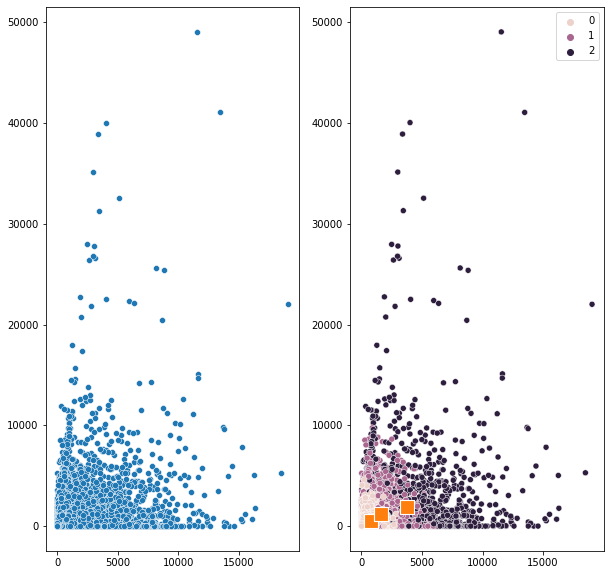

In [11]:
f, axes, = plt.subplots(1,2, figsize=(10,10))
scatter(X[:,0], X[:,1], ax = axes[0])
scatter(X[:,0], X[:,1], ax = axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1], marker="s", s=200)
plt.show()

In [12]:
cluster_dict=[]
for c in fcm_labels:
    cluster_dict.append(c)

In [ ]:
df_using['cluster']=cluster_dict
df_using

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,BALANCE,PURCHASES,ONEOFF_PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,cluster
0,40.900749,95.40,0.00,1000.0,201.802084,139.509787,0
1,3202.467416,0.00,0.00,7000.0,4103.032597,1072.340217,1
2,2495.148862,773.17,773.17,7500.0,622.066742,627.284787,1
3,1666.670542,1499.00,1499.00,7500.0,0.000000,0.000000,1
4,817.714335,16.00,16.00,1200.0,678.334763,244.791237,0
...,...,...,...,...,...,...,...
8945,28.493517,291.12,0.00,1000.0,325.594462,48.886365,0
8946,19.183215,300.00,0.00,1000.0,275.861322,0.000000,0
8947,23.398673,144.40,0.00,1000.0,81.270775,82.418369,0
8948,13.457564,0.00,0.00,500.0,52.549959,55.755628,0


**MENGELOMPOKKAN DATA SESUAI KLUSTER**

**CLUSTER 1**

In [ ]:
df_c1 = df_using[df_using['cluster']== 0]

df_c1

,BALANCE,PURCHASES,ONEOFF_PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,cluster
0,40.900749,95.40,0.00,1000.0,201.802084,139.509787,0
4,817.714335,16.00,16.00,1200.0,678.334763,244.791237,0
5,1809.828751,1333.28,0.00,1800.0,1400.057770,2407.246035,0
7,1823.652743,436.20,0.00,2300.0,679.065082,532.033990,0
10,1293.124939,920.12,0.00,1200.0,1083.301007,2172.697765,0
...,...,...,...,...,...,...,...
8945,28.493517,291.12,0.00,1000.0,325.594462,48.886365,0
8946,19.183215,300.00,0.00,1000.0,275.861322,0.000000,0
8947,23.398673,144.40,0.00,1000.0,81.270775,82.418369,0
8948,13.457564,0.00,0.00,500.0,52.549959,55.755628,0


Total yang masuk kedalam cluster 1 berjumlah 5005 data

**CLUSTER 2**

In [ ]:
df_c1 = df_using[df_using['cluster']== 1]

df_c1

,BALANCE,PURCHASES,ONEOFF_PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,cluster
1,3202.467416,0.00,0.00,7000.0,4103.032597,1072.340217,1
2,2495.148862,773.17,773.17,7500.0,622.066742,627.284787,1
3,1666.670542,1499.00,1499.00,7500.0,0.000000,0.000000,1
8,1014.926473,861.49,661.49,7000.0,688.278568,311.963409,1
13,921.693369,2137.93,419.96,7500.0,1655.891435,251.137986,1
...,...,...,...,...,...,...,...
8769,116.581583,1045.14,227.14,9000.0,1258.396242,144.115556,1
8804,1704.571464,0.00,0.00,5000.0,573.683142,480.409005,1
8813,3335.053583,0.00,0.00,7000.0,931.371718,1006.983314,1
8835,1868.576501,1337.34,1294.84,3000.0,3236.129237,384.230828,1


Total yang masuk kedalam cluster 2 berjumlah 2470 Data

**CLUSTER 3**

In [ ]:
df_c1 = df_using[df_using['cluster']== 2]

df_c1

,BALANCE,PURCHASES,ONEOFF_PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,cluster
6,627.260806,7091.01,6402.63,13500.0,6354.314328,198.065894,2
9,152.225975,1281.60,1281.60,11000.0,1164.770591,100.302262,2
15,6886.213231,1611.70,0.00,8000.0,1993.439277,2109.906490,2
18,1989.072228,504.35,166.00,13000.0,1720.837373,744.613395,2
21,6369.531318,6359.95,5910.04,11250.0,2077.959051,1659.775075,2
...,...,...,...,...,...,...,...
8737,2533.618119,5633.83,2985.92,9000.0,8176.953944,602.963244,2
8743,40.960739,472.75,431.37,13000.0,0.000000,0.000000,2
8774,2585.246439,338.00,0.00,9000.0,866.276894,776.501849,2
8857,2330.222764,1320.00,0.00,10000.0,8157.666434,283.362434,2


Total yang masuk kedalam cluster 3 berjumlah 1475 Data

In [13]:
df.to_excel('credit_data.xlsx')